# Logistic Regression
## Introduction
Logistic regression is a statistical method used for binary classification tasks, where the goal is to predict one of two possible outcomes. It models the probability that a given input belongs to a particular class using a logistic function (also known as the sigmoid function). The logistic function maps any real-valued number into a value between 0 and 1, which can be interpreted as the probability of the positive class. The model is trained by finding the optimal weights that minimize the difference between predicted probabilities and actual outcomes, typically using methods like gradient descent. Despite its simplicity, logistic regression is widely used for tasks such as spam detection, medical diagnoses, and credit scoring.


## Explanation of the Algorithm in Python
### Import the libraries
Import the necessary libraries like numpy, pandas, and matplotlib.


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading the Dataset
The dataset contains the features `Age` and `Purchased` (indicating if a purchase was made).

In [25]:
data = pd.read_csv(r"C:\Users\arsha\OneDrive - Manipal Academy of Higher Education\Desktop\Cryptonite\Sample_Datasets\logistic_reg_dataset.csv")  
x = data['Age'].values  
y = data['Purchased'].values  
x = x.reshape(-1, 1)  
X = np.c_[np.ones(x.shape[0]), x] 
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


### Sigmoid Function
The sigmoid function converts the output of the linear model into a probability between 0 and 1.

In [21]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### Logistic Regression Training Function
We use gradient descent to minimize the error in our logistic regression model. The function `logistic_regression` updates the weights iteratively.


In [22]:
def logistic_regression(X, y, learning_rate, iterations):
    weights = np.zeros(X.shape[1])  
    m = len(y)  
    for i in range(iterations):
        z = np.dot(X, weights) 
        h = sigmoid(z)  
        gradient = np.dot(X.T, (h - y)) / m 
        weights -= learning_rate * gradient 
    return weights
learning_rate = 0.01
iterations = 10000
weights = logistic_regression(X, y, learning_rate, iterations)
print("Weights:", weights)

Weights: [-6.09325938  0.21891418]


### Predicting Purchase Probability
The `predict_purchase` function uses the trained model to predict the probability of a purchase for a given age and classifies the result as `Purchased` or `Not Purchased`.


In [23]:
def predict_purchase(age):
    z = weights[0] + weights[1] * age
    probability = sigmoid(z)
    return probability, 1 if probability >= 0.5 else 0
user_age = 32 # User input
probability, purchase_prediction = predict_purchase(user_age)
print(f"Predicted probability of purchase: {probability:.2f}")

Predicted probability of purchase: 0.71


### Plotting the Logistic Regression Fit
We visualize the logistic regression fit with the data points and the user input highlighted.


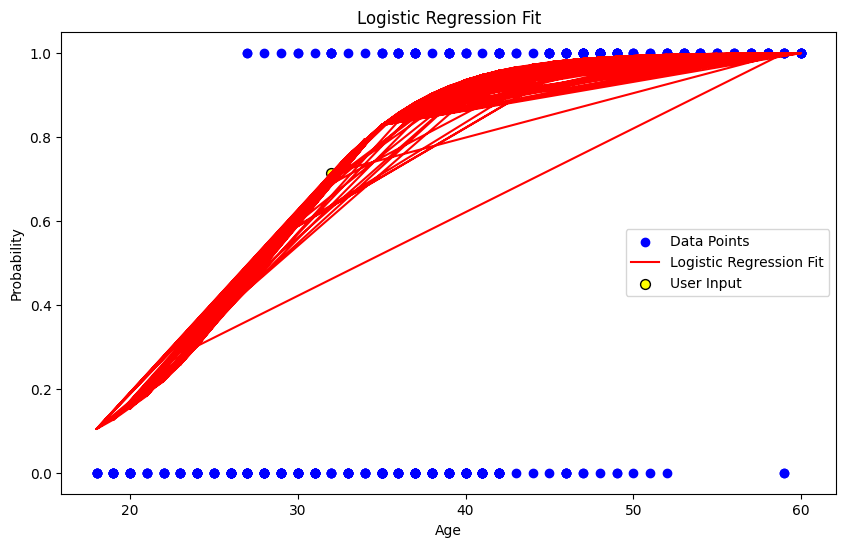

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x, sigmoid(np.dot(X, weights)), color='red', label='Logistic Regression Fit')
plt.scatter(user_age, probability, color='yellow', edgecolor='black', s=50, label='User Input')
plt.xlabel('Age')
plt.ylabel('Probability')
plt.title('Logistic Regression Fit')
plt.legend()
plt.show()


# Theory for Logistic Regression

We could approach the classification problem ignoring the fact that $y$ is discrete-valued, and use our old linear regression algorithm to try to predict $y$ given $x$. However, it is easy to construct examples where this method performs very poorly. Intuitively, it also doesn’t make sense for $h_{\theta}(x)$ to take values larger than 1 or smaller than 0 when we know that $y \in \{0, 1\}$.    

To fix this, let’s change the form for our hypotheses $h_{\theta}(x)$. We will choose:
$$ h_{\theta}(x) = g(\theta^T x) = \frac{1}{1 + e^{-\theta^T x}} $$  

In this equation, $g(z)$ is called the logistic function or the sigmoid function. It can be written as: 
$$ g(z) = \frac{1}{1 + e^{-z}} $$  

If we plot the sigmoid function on a graph, it looks as follows:  
![s16184211132024](https://a.okmd.dev/md/6734840a9cf7c.png)  

Now, let us assume that: 
$$ P(y = 1 \mid x; \theta) = h_{\theta}(x) $$

$$ P(y = 0 \mid x; \theta) = 1 - h_{\theta}(x) $$  

Assuming that the $n$ training examples were generated independently, we can then write down the likelihood of the parameters as:  
$$ L(\theta) = \prod_{i=1}^{n} \left[ h_{\theta}(x^{(i)})^{y^{(i)}} \left( 1 - h_{\theta}(x^{(i)}) \right)^{1 - y^{(i)}} \right] $$

Since it is easier to maximize the log likelihood:  
$$ \log L(\theta) = \sum_{i=1}^{n} \left[ y^{(i)} \log h_{\theta}(x^{(i)}) + (1 - y^{(i)}) \log(1 - h_{\theta}(x^{(i)})) \right] $$

To maximize the log-likelihood function and find the optimal values for the parameters $ \theta $, we use Gradient Ascent. The update rule for each parameter $ \theta_j $ is:  

$$ \theta_j := \theta_j + \sum_{i=1}^{m} \frac{\partial \log L(\theta)}{\partial \theta_j} $$

By substituting the value of $ \ell(\theta) $ from above and solving the derivatives, we get:  

$$ \theta_j := \theta_j + \alpha \sum_{i=1}^{m} \left( y^{(i)} - h_{\theta}(x^{(i)}) \right) x_j^{(i)} $$

